In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [2]:
DATASET_NAME = Targets.Distributive
generalisation_mode = GeneralisationModes.weak
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [4]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [5]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 3.], dtype=float32), array([    6, 13889]))
[0.9986166  0.00113173]


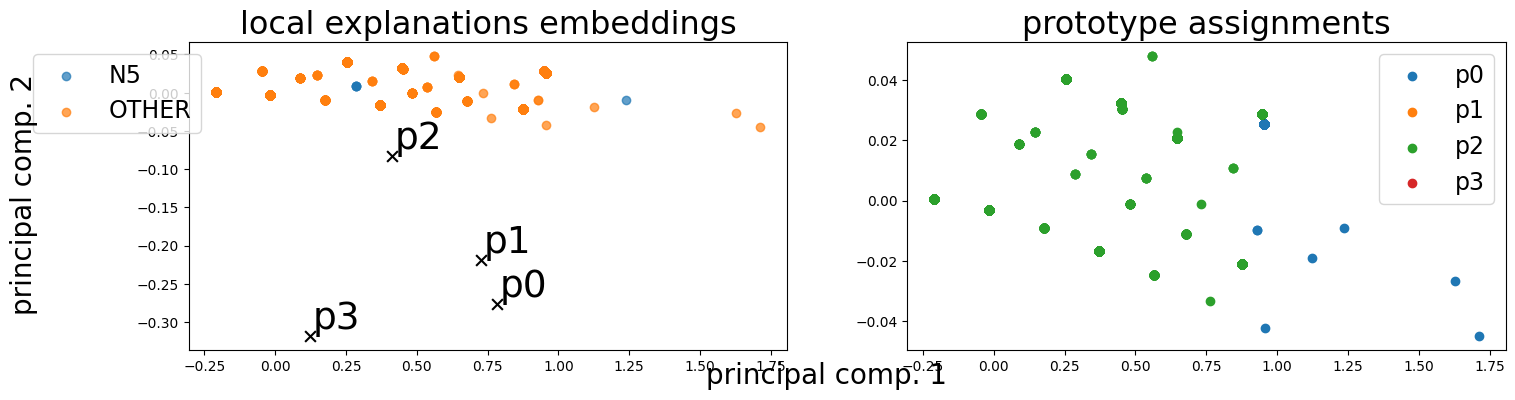

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 0.997901 +- 0.001732
Concept distribution:  (array([0, 2]), array([  261, 13634]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.11013, LEN: 0.072984, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.09781, V. LEN 0.072
  2: Loss: 0.07903, LEN: 0.068646, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.08311, V. LEN 0.068
  3: Loss: 0.07023, LEN: 0.064646, Acc: 0.30, V. Acc: 0.67, V. Loss: 0.07991, V. LEN 0.064
  4: Loss: 0.06613, LEN: 0.062120, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.07166, V. LEN 0.063
  5: Loss: 0.06433, LEN: 0.061323, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.07356, V. LEN 0.063
  6: Loss: 0.06366, LEN: 0.061135, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.07031, V. LEN 0.062
  7: Loss: 0.06355, LEN: 0.061324, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.07191, V. LEN 0.063
  8: Loss: 0.06303, LEN: 0.061289, Acc: 0.67, V. Acc: 0

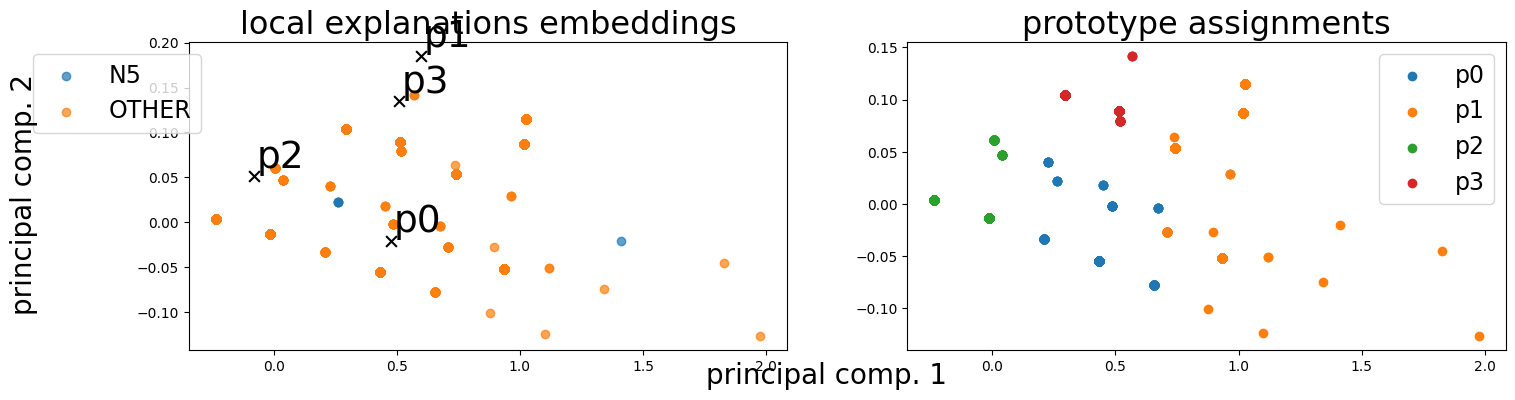

Alpha norms:
tensor([[1.0000, 0.2154, 0.2797, 0.5469],
        [1.0000, 0.1571, 0.1695, 0.3188]])
Concept Purity: 0.999066 +- 0.000965
Concept distribution:  (array([0, 1, 2, 3]), array([ 1809,  1312, 10321,   453]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.6736)

 20: Loss: 0.06080, LEN: 0.060420, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.06070, V. LEN 0.060
 21: Loss: 0.06055, LEN: 0.060113, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.06093, V. LEN 0.060
 22: Loss: 0.06064, LEN: 0.060242, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.05996, V. LEN 0.059
 23: Loss: 0.06021, LEN: 0.059757, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.05889, V. LEN 0.058
 24: Loss: 0.05983, LEN: 0.059389, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.06090, V. LEN 0.060
 25: Loss: 0.05927, LEN: 0.058887, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.06166, V. LEN 0.061
 26: Loss: 0.05872, LEN: 0.058299, Acc: 0.67, V. Acc: 0.67, V. Loss: 0.06163, V. LEN 0.060
 27: Loss: 0.05745, LEN: 0.057

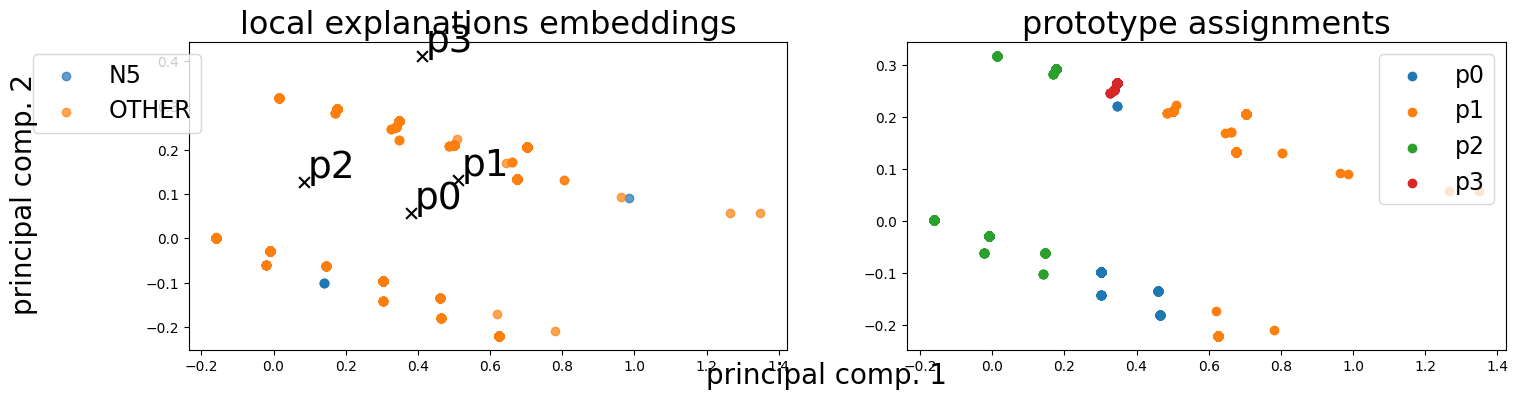

Alpha norms:
tensor([[1.0000, 0.0924, 0.0672, 0.1389],
        [1.0000, 0.0214, 0.0218, 0.0486]])
Concept Purity: 0.999512 +- 0.000647
Concept distribution:  (array([0, 1, 2, 3]), array([ 1777,  1269, 10606,   243]))
Logic formulas:
For class 0:
0.6954887218045113 (feature0000000001) | (feature0000000000) | ((feature0000000002) | ((feature0000000002 & feature0000000000) | ((feature0000000002 & feature0000000001) | (feature0000000001 & feature0000000000)
For class 1:
0.6955827067669172 (feature0000000003)
Accuracy as classifier:  0.6955
LEN fidelity:  tensor(0.6955)

 40: Loss: 0.05221, LEN: 0.051936, Acc: 0.73, V. Acc: 0.69, V. Loss: 0.05718, V. LEN 0.055
 41: Loss: 0.05242, LEN: 0.052095, Acc: 0.73, V. Acc: 0.71, V. Loss: 0.05528, V. LEN 0.054
 42: Loss: 0.05154, LEN: 0.051287, Acc: 0.74, V. Acc: 0.71, V. Loss: 0.05464, V. LEN 0.053
 43: Loss: 0.05193, LEN: 0.051634, Acc: 0.74, V. Acc: 0.71, V. Loss: 0.06053, V. LEN 0.060
 44: Loss: 0.05801, LEN: 0.056890, Acc: 0.73, V. Acc: 0.73, V. 

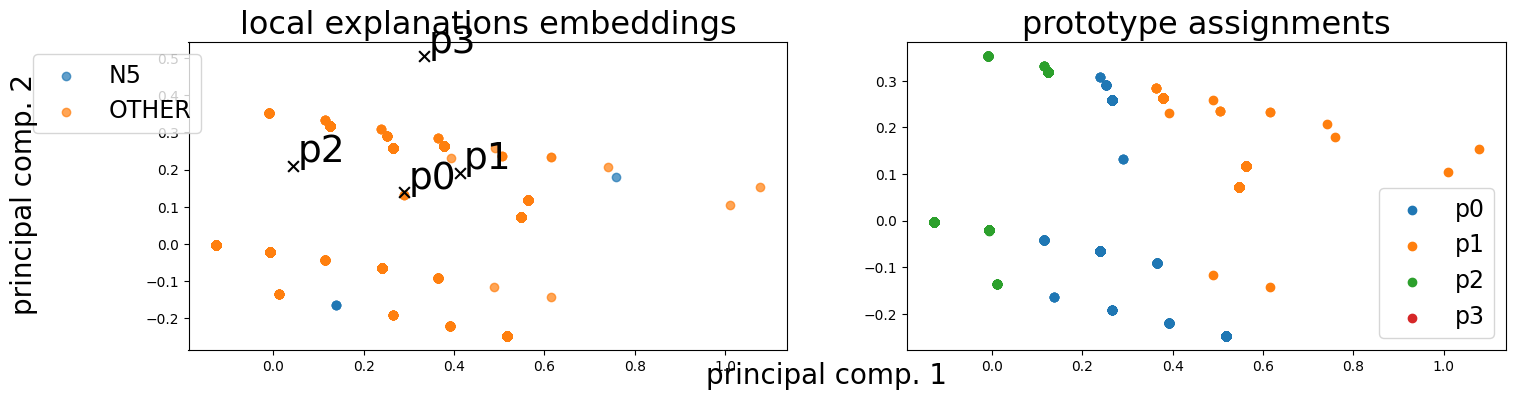

Alpha norms:
tensor([[1.0000, 0.1132, 0.0717, 0.1230],
        [1.0000, 0.0303, 0.0212, 0.0374]])
Concept Purity: 0.998661 +- 0.001011
Concept distribution:  (array([0, 1, 2]), array([ 2538,   819, 10538]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.6736)

 60: Loss: 0.05033, LEN: 0.050106, Acc: 0.75, V. Acc: 0.67, V. Loss: 0.06820, V. LEN 0.066
 61: Loss: 0.05119, LEN: 0.050943, Acc: 0.74, V. Acc: 0.68, V. Loss: 0.06758, V. LEN 0.065
 62: Loss: 0.04999, LEN: 0.049745, Acc: 0.75, V. Acc: 0.71, V. Loss: 0.05644, V. LEN 0.055
 63: Loss: 0.05000, LEN: 0.049780, Acc: 0.75, V. Acc: 0.67, V. Loss: 0.06162, V. LEN 0.060
 64: Loss: 0.04935, LEN: 0.049154, Acc: 0.75, V. Acc: 0.67, V. Loss: 0.06186, V. LEN 0.060
 65: Loss: 0.04952, LEN: 0.049320, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.04711, V. LEN 0.046
 66: Loss: 0.05191, LEN: 0.051611, Acc: 0.74, V. Acc: 0.67, V. Loss: 0.06854, V. LEN 0.066
 67: Loss: 0.04996, LEN: 0.049774, Acc: 

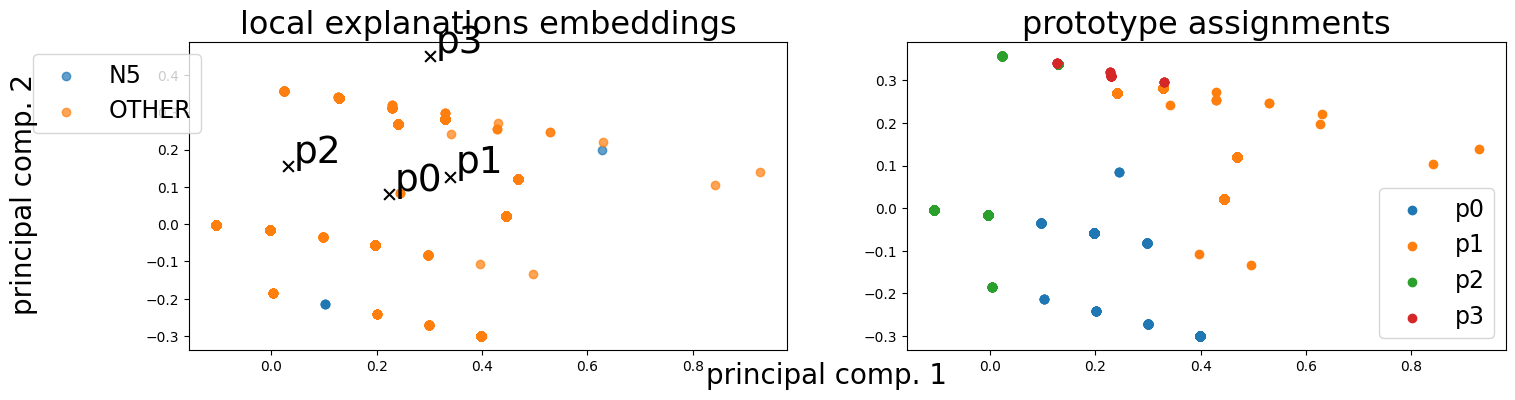

Alpha norms:
tensor([[1.0000, 0.1681, 0.1037, 0.1610],
        [1.0000, 0.0535, 0.0321, 0.0503]])
Concept Purity: 0.999076 +- 0.000927
Concept distribution:  (array([0, 1, 2, 3]), array([ 2295,  1024, 10532,    44]))
Logic formulas:
For class 0:
0.675093984962406 (feature0000000000) | (feature0000000001) | ((feature0000000002) | (feature0000000003 & feature0000000000) | (feature0000000001 & feature0000000000) | ((feature0000000002 & feature0000000000) | ((feature0000000002 & feature0000000001) | ((feature0000000002 & feature0000000003)
For class 1:
0.675093984962406 (feature0000000003)
Accuracy as classifier:  0.6751
LEN fidelity:  tensor(0.6750)

 80: Loss: 0.05017, LEN: 0.049958, Acc: 0.75, V. Acc: 0.68, V. Loss: 0.06268, V. LEN 0.061
 81: Loss: 0.04896, LEN: 0.048793, Acc: 0.75, V. Acc: 0.69, V. Loss: 0.06008, V. LEN 0.059
 82: Loss: 0.04901, LEN: 0.048871, Acc: 0.75, V. Acc: 0.69, V. Loss: 0.06210, V. LEN 0.060
 83: Loss: 0.04922, LEN: 0.049081, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.

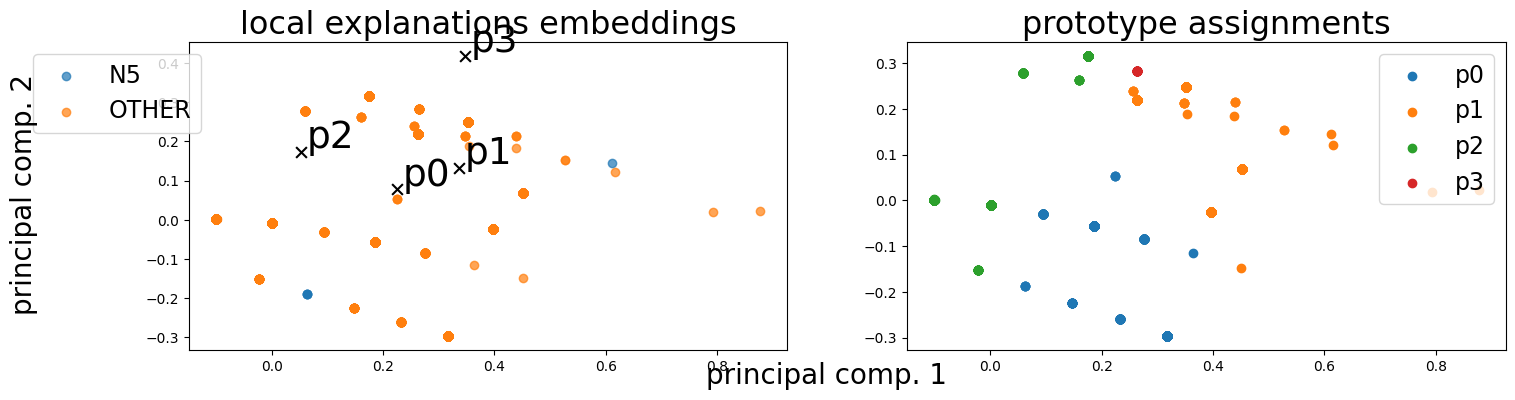

Alpha norms:
tensor([[1.0000, 0.1935, 0.1199, 0.1897],
        [1.0000, 0.0688, 0.0397, 0.0649]])
Concept Purity: 0.999080 +- 0.000923
Concept distribution:  (array([0, 1, 2, 3]), array([ 2296,  1032, 10538,    29]))
Logic formulas:
For class 0:
0.6762218045112782 (feature0000000000) | (feature0000000001) | ((feature0000000002) | (feature0000000003 & feature0000000000) | (feature0000000001 & feature0000000000) | ((feature0000000002 & feature0000000000) | ((feature0000000002 & feature0000000001)
For class 1:
0.6762218045112782 (feature0000000003)
Accuracy as classifier:  0.6762
LEN fidelity:  tensor(0.6762)

100: Loss: 0.04809, LEN: 0.047955, Acc: 0.75, V. Acc: 0.68, V. Loss: 0.06043, V. LEN 0.059
101: Loss: 0.04804, LEN: 0.047883, Acc: 0.76, V. Acc: 0.74, V. Loss: 0.05343, V. LEN 0.052
102: Loss: 0.04846, LEN: 0.048323, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.04932, V. LEN 0.048
103: Loss: 0.04847, LEN: 0.048334, Acc: 0.75, V. Acc: 0.74, V. Loss: 0.05236, V. LEN 0.051
104: Loss: 0.04874, L

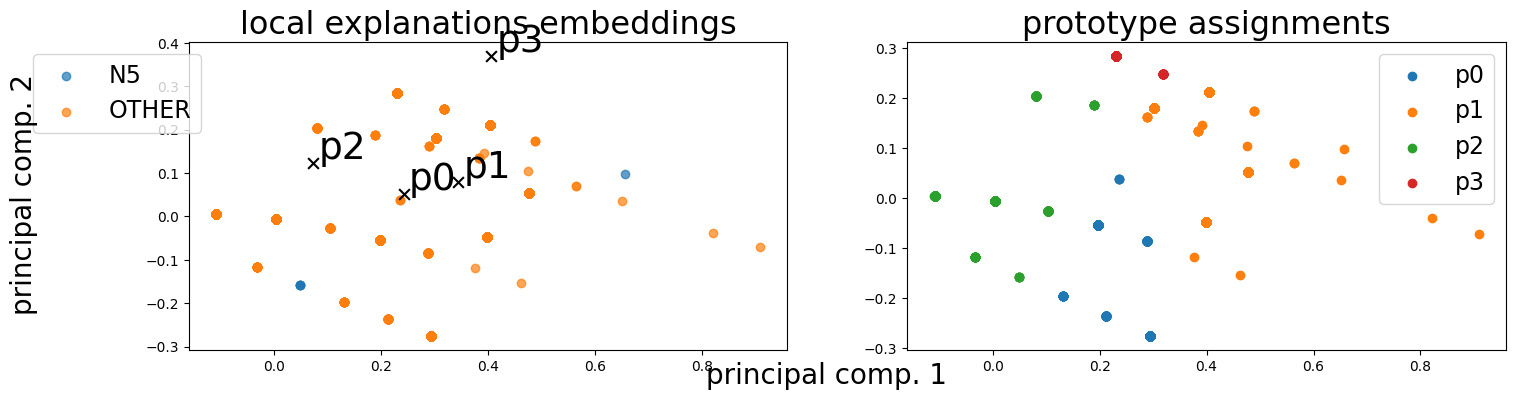

Alpha norms:
tensor([[1.0000, 0.2007, 0.1236, 0.2081],
        [1.0000, 0.0706, 0.0390, 0.0641]])
Concept Purity: 0.999420 +- 0.000798
Concept distribution:  (array([0, 1, 2, 3]), array([ 2227,  1033, 10395,   240]))
Logic formulas:
For class 0:
0.6949248120300752 (feature0000000000) | (feature0000000001) | ((feature0000000002) | ((feature0000000002 & feature0000000000) | ((feature0000000002 & feature0000000003) | ((feature0000000002 & feature0000000001) | (feature0000000001 & feature0000000000)
For class 1:
0.6949248120300752 (feature0000000003)
Accuracy as classifier:  0.6949
LEN fidelity:  tensor(0.6949)

120: Loss: 0.04806, LEN: 0.047934, Acc: 0.76, V. Acc: 0.70, V. Loss: 0.06085, V. LEN 0.060
121: Loss: 0.04801, LEN: 0.047889, Acc: 0.76, V. Acc: 0.74, V. Loss: 0.05154, V. LEN 0.051
122: Loss: 0.04770, LEN: 0.047574, Acc: 0.75, V. Acc: 0.67, V. Loss: 0.06305, V. LEN 0.062
123: Loss: 0.04823, LEN: 0.048101, Acc: 0.75, V. Acc: 0.74, V. Loss: 0.05121, V. LEN 0.050
124: Loss: 0.04786, 

In [ ]:
expl.iterate(train_group_loader, test_group_loader, plot=True)

In [ ]:
expl.inspect(test_group_loader)

In [ ]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()

In [ ]:
fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	G = nx.Graph(adjs_train[i], undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=25)

In [ ]:
import numpy as np
data = np.load("local_features/PGExplainer/Distributive_weak/x_train.npz")
y = np.load("local_features/PGExplainer/Distributive_weak/y_train.npy")
adjs = list(data.values())

fig, axs = plt.subplots(9, 9, figsize=(15, 15))
axs = axs.flatten()

for i in range(81):
	adj = adjs[i].squeeze()
	adj[adj > 0] = 1
	G = nx.Graph(adj, undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=10)
	axs[i].set_title(f'Class={y[i]}')